# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from selenium import webdriver

In [2]:
browser = webdriver.Chrome()

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Get the page source (HTML content)
html_content = browser.page_source

# Parse the HTML content with BeautifulSoup
soup = soup(html_content, 'html.parser')

# Print each line of the HTML content
for line in soup.prettify().split('\n'):
    print(line)

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <main>
   <div class="container py-4">
    <header class="pb-3 mb-4 border-bottom">
     <a class="d-flex align-items-center text-dark text-decoration-none" href="/">
      <span class="fs-4">
       Mission To Mars
      </span>
     </a>
    </header>
    <div class="p-5 mb-4 bg-light rounded-3">
     <div class="container-fluid py-5">
      <h1 class="display-5 fw-bold">
       Mars Temperature Data
      </h1>
      <p class="col-md-8 fs-4">
       This is Mars data.
      </p>
      <table class="table">
       <tbody>
        <tr>
         <th>
          id
         </th>
         <th>
          terrestrial_date
     

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [5]:
# Find the table containing the data
table = soup.find('table')

In [6]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_weather = []
mars_weather = {column: [] for column in columns}

# Loop through the scraped data to create a list of rows
data = {column: [] for column in columns}

# Initialize lists to store data
# Extract data from table rows
for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = row.find_all('td')
    for i, column in enumerate(columns):
        data[column].append(cells[i].get_text())
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df_marts_weather = pd.DataFrame(data)

In [7]:
# Confirm DataFrame was created successfully
print(df_marts_weather)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df_marts_weather.dtypes
type(df_marts_weather)

pandas.core.frame.DataFrame

In [11]:
# Change data types for data analysis
df_marts_weather['id'] = df_marts_weather['id'].astype(int)
df_marts_weather['terrestrial_date'] = pd.to_datetime(df_marts_weather['terrestrial_date'])
df_marts_weather['sol'] = df_marts_weather['sol'].astype(int)
df_marts_weather['ls'] = df_marts_weather['ls'].astype(int)
df_marts_weather['month'] = df_marts_weather['month'].astype(int)
df_marts_weather['min_temp'] = df_marts_weather['min_temp'].astype(float)
df_marts_weather['pressure'] = df_marts_weather['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
# Verify the data types after conversion
print(df_marts_weather.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [13]:
df_marts_weather.head(3)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0


In [18]:
terrestrial_date = df_marts_weather['terrestrial_date'].unique()
print("Distinct sol values:", terrestrial_date)

Distinct sol values: <DatetimeArray>
['2012-08-16 00:00:00', '2012-08-17 00:00:00', '2012-08-18 00:00:00',
 '2012-08-19 00:00:00', '2012-08-20 00:00:00', '2012-08-21 00:00:00',
 '2012-08-22 00:00:00', '2012-08-23 00:00:00', '2012-08-27 00:00:00',
 '2012-08-28 00:00:00',
 ...
 '2018-02-18 00:00:00', '2018-02-19 00:00:00', '2018-02-20 00:00:00',
 '2018-02-21 00:00:00', '2018-02-22 00:00:00', '2018-02-23 00:00:00',
 '2018-02-24 00:00:00', '2018-02-25 00:00:00', '2018-02-26 00:00:00',
 '2018-02-27 00:00:00']
Length: 1867, dtype: datetime64[ns]


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [ ]:
#Google: how many months are in the martian calendar?
#24 months
#A common year would have 672 Martian days distributed into 24 months of 28 days (of 4 weeks of 7 days each).

In [16]:
# 1. How many months are there on Mars?
# Assuming 'sol' column represents the number of sols since the start of the mission

# Calculate the number of Martian months
import numpy as np

# Find the first and last sols in the dataset
first_sol = df_marts_weather['sol'].min()
last_sol = df_marts_weather['sol'].max()

# Calculate the total number of sols in the dataset
total_sols = last_sol - first_sol + 1  # Adding 1 because sols start from 0

# Calculate the average number of sols per Martian month
average_sols_per_month = 672 / 24  # 672 sols per year, distributed over 24 months

# Estimate the number of Martian months
estimated_num_martian_months = total_sols / average_sols_per_month

# Print the result
print("Estimated number of Martian months:", estimated_num_martian_months)


Number of Martian months: 70.60714285714286


In [19]:
# 2. How many Martian days' worth of data are there?
# Find the minimum and maximum sol values in the dataset
min_sol = df_marts_weather['sol'].min()
max_sol = df_marts_weather['sol'].max()

# Calculate the total number of Martian days' worth of data
total_days = max_sol - min_sol + 1

print("Total number of Martian days' worth of data:", total_days)



Total number of Martian days' worth of data: 1968


In [20]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = df_marts_weather.groupby('month')['min_temp'].mean()
print("Average low temperature by month:")
print(average_low_temp_by_month)

1867

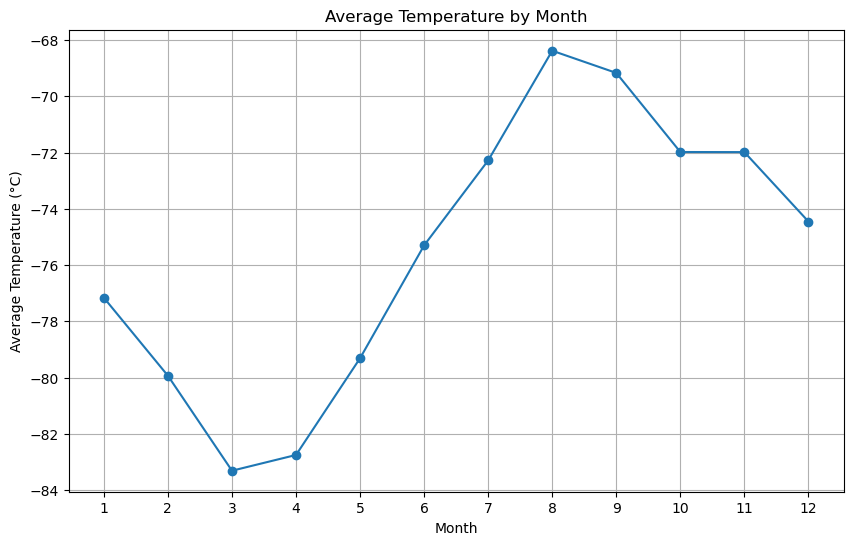

In [21]:
# Plot the average temperature by month
import matplotlib.pyplot as plt

# Group the DataFrame by the 'month' column and calculate the mean temperature for each group
average_temp_by_month = df_marts_weather.groupby('month')['min_temp'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_temp_by_month.index, average_temp_by_month.values, marker='o', linestyle='-')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(range(1, 13))  # Assuming months are represented as integers from 1 to 12
plt.grid(True)
plt.show()


In [ ]:
# Identify the coldest and hottest months in Curiosity's location


In [22]:
# 4. Average pressure by Martian month
# Group the DataFrame by the 'month' column and calculate the mean temperature for each group
average_temp_by_month = df_marts_weather.groupby('month')['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = average_temp_by_month.idxmin()  # idxmin() returns the index of the minimum value
hottest_month = average_temp_by_month.idxmax()  # idxmax() returns the index of the maximum value

# Get the temperature values for the coldest and hottest months
coldest_temp = average_temp_by_month.min()
hottest_temp = average_temp_by_month.max()

print("Coldest month:", coldest_month, "with an average temperature of", coldest_temp, "°C")
print("Hottest month:", hottest_month, "with an average temperature of", hottest_temp, "°C")


Coldest month: 3 with an average temperature of -83.30729166666667 °C
Hottest month: 8 with an average temperature of -68.38297872340425 °C


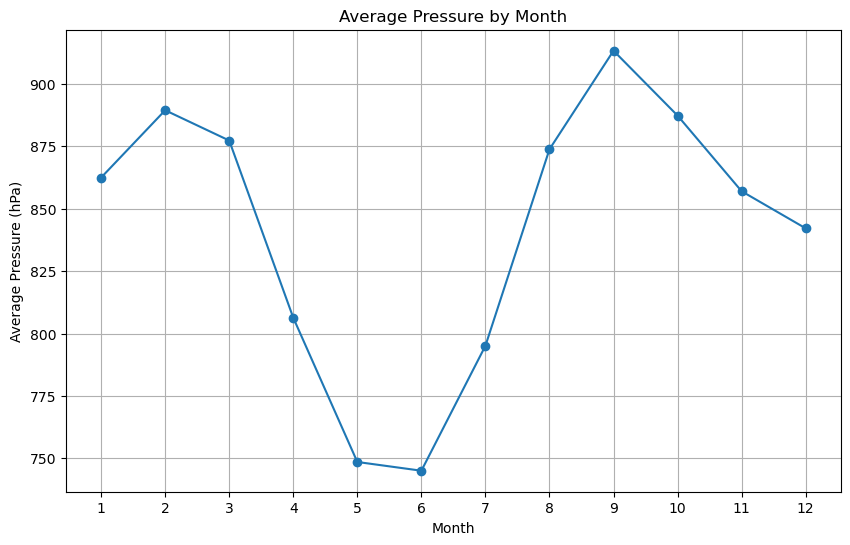

In [23]:
# Plot the average pressure by month
import matplotlib.pyplot as plt

# Group the DataFrame by the 'month' column and calculate the mean pressure for each group
average_pressure_by_month = df_marts_weather.groupby('month')['pressure'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_pressure_by_month.index, average_pressure_by_month.values, marker='o', linestyle='-')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (hPa)')
plt.xticks(range(1, 13))  # Assuming months are represented as integers from 1 to 12
plt.grid(True)
plt.show()


In [24]:
# 5. How many terrestrial (earth) days are there in a Martian year?
martian_year_in_martian_days = 687
length_of_earth_day_in_seconds = 24 * 60 * 60

martian_year_in_earth_days = martian_year_in_martian_days * (length_of_earth_day_in_seconds / 86400)  # 86400 seconds in an Earth day
print("Number of terrestrial (Earth) days in a Martian year:", martian_year_in_earth_days)

Number of terrestrial (Earth) days in a Martian year: 687.0


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
# Assuming your DataFrame is named df_marts_weather
df_marts_weather.to_csv('marts_weather_data.csv', index=False)

In [26]:
browser.quit()